### Description of the Project
<div>
    <br>
    <img src="HW1_hateful_tweets_detection_Document.png", width="650"/>
</div>

### Load the Datasets

In [2]:
import pandas as pd
train = pd.read_csv('/Users/leosu/Desktop/BD_HW1/train.csv')
test = pd.read_csv('/Users/leosu/Desktop/BD_HW1/test.csv')

In [28]:
train.head(5)

,class,tweet
0,1,pm son of a bitch ate my mac n cheese
1,1,bryceserna dont be a pussy grab the booty lov...
2,2,clicquotsuave bunch of rappers boutta flood t...
3,2,wow thats great language coming from a hs coa...
4,1,and this is why im single i dont fuck with bit...


In [29]:
test.head(5)

,id,tweet
0,0,rt urkindofbrand dawg rt sbabylife you ever f...
1,1,rt cganderson vivabased she look like a tranny
2,2,brighterdays i can not just sit up and hate on...
3,3,selfiequeenbri cause im tired of you big bitch...
4,4,rhythmixx hobbies include fighting mariambitch


### Clean the Text

In [5]:
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(([0-9]+)|(^@[A-Za-z0-9]+))|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df
test_clean = clean_text(test, "tweet")
train_clean = clean_text(train, "tweet")

In [30]:
test_clean.head(10)

,id,tweet
0,0,rt urkindofbrand dawg rt sbabylife you ever f...
1,1,rt cganderson vivabased she look like a tranny
2,2,brighterdays i can not just sit up and hate on...
3,3,selfiequeenbri cause im tired of you big bitch...
4,4,rhythmixx hobbies include fighting mariambitch
5,5,keeks is a bitch she curves everyone lol i w...
6,6,so hoes that smoke are losers yea go on ig
7,7,bitch get up off me
8,8,bitch nigga miss me with it
9,9,black bottle amp a bad bitch


In [31]:
train_clean.head(10)

,class,tweet
0,1,pm son of a bitch ate my mac n cheese
1,1,bryceserna dont be a pussy grab the booty lov...
2,2,clicquotsuave bunch of rappers boutta flood t...
3,2,wow thats great language coming from a hs coa...
4,1,and this is why im single i dont fuck with bit...
5,1,tharealist dono yea that hoe was rocking frid...
6,1,they should free all da real niccas n give the...
7,0,ur a fag
8,1,gregabbotttx a judge that was appointed by ob...
9,2,i wonder if i have my very own nsa spook foll...


### Create Word Clouds

#### 1. Create Word Cloud for All the text

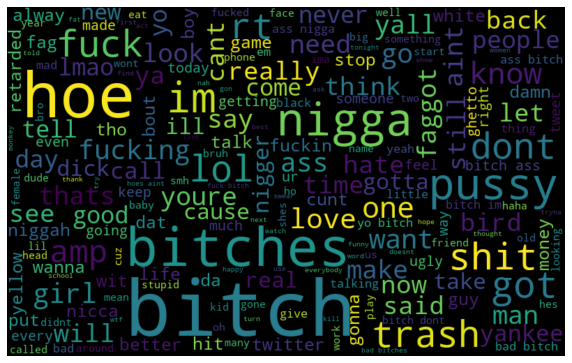

In [33]:
all_words = ' '.join([text for text in train['tweet']])
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### 2. Create Word Cloud for class = 0 

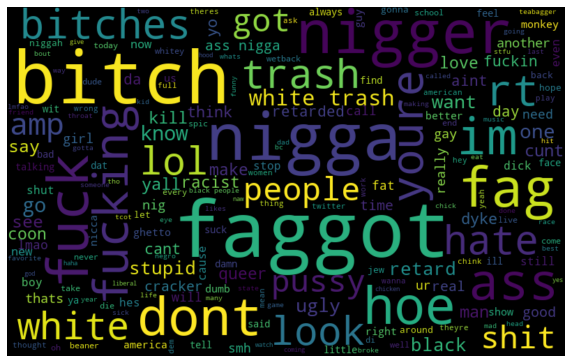

In [25]:
normal_words =' '.join([text for text in train['tweet'][train['class'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### 3. Create Word Cloud for class = 1

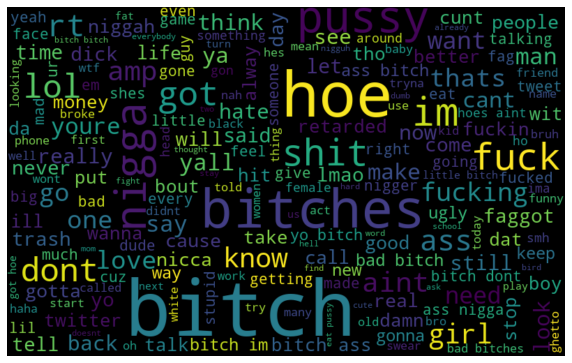

In [26]:
normal_words =' '.join([text for text in train['tweet'][train['class'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### 4. Create Word Cloud for class = 2 

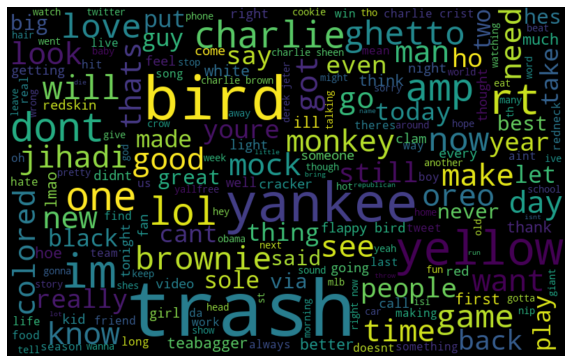

In [27]:
normal_words =' '.join([text for text in train['tweet'][train['class'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Upsampling
- Split the datasets into two groups. One's **class = 1**, and the other one's **class != 1**.
- Upsample the group whose **class != 1**, making it have the same amount of data as the group whose class = 1.

In [21]:
from sklearn.utils import resample
train_majority = train[train["class"]==1]
train_minority = train[train["class"]!=1]
train_minority_upsampled = resample(train_minority, 
                                 replace=1,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])

#### The amount of data of each class after upsampling 

In [9]:
train_upsampled["class"].value_counts()

1    11491
2     8526
0     2965
Name: class, dtype: int64

### Split the Data into Training and Validation Data

In [12]:
from sklearn.model_selection import train_test_split
text_train, text_test, y_train, y_test = train_test_split(train_upsampled['tweet'],                                    
                                                    train_upsampled['class'], random_state = 0)
#text_train is the training data
#text_test is the validation data

### Bag of Words

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(min_df=4)
vectorizer.fit(text_train) #build the model

X_train=vectorizer.transform(text_train)
X_test=vectorizer.transform(text_test)

print(len(vectorizer.vocabulary_))
print(X_train.shape)
print(vectorizer.get_feature_names()[:10])
print(vectorizer.get_feature_names()[2000:2010])
print(vectorizer.get_feature_names()[5000:5010])


print(X_train.shape)
print(X_test.shape)

5871
(17236, 5871)
['aamaadmiparty', 'aap', 'aaron', 'abby', 'abcbirds', 'ability', 'able', 'abo', 'abortion', 'about']
['gang', 'gangs', 'gangsters', 'garbage', 'garden', 'gardner', 'gas', 'gasping', 'gassing', 'gates']
['tape', 'tar', 'taste', 'tastes', 'tattoo', 'tattoos', 'taught', 'tax', 'taxes', 'taxing']
(17236, 5871)
(5746, 5871)


### Classification Model 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn import model_selection, naive_bayes, svm
from sklearn import ensemble


clf = svm.SVC(C=0.1, kernel='linear', degree=5, gamma='auto')
# clf = ensemble.ExtraTreesClassifier(n_estimators=300)
# clf = naive_bayes.MultinomialNB()
# clf = AdaBoostClassifier(n_estimators=100,base_estimator=SVM,learning_rate=1)

clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
print(clf.score(X_train,y_train))

0.8938391924817264
0.9307263866326294


### Predict the Result of the Testing Data

In [34]:
bag_of_words_outcome=vectorizer.transform(test_clean["tweet"]) # run bag of words on testing data
print(bag_of_words_outcome.shape)
Outcome_predict=clf.predict(bag_of_words_outcome) #predict the result

(9914, 5871)


In [19]:
id = test['id']
dict = {"id": id,  
        "class": Outcome_predict
       }

test_df = pd.DataFrame(data = dict, columns = ["id", "class"])

test_df.head(6)

,id,class
0,0,1
1,1,2
2,2,1
3,3,1
4,4,2
5,5,1


### Export to csv file

In [20]:
import os
import time
print("檔案會存在該路徑下：", os.getcwd())
export_csv = test_df.to_csv (r'submission_'+time.strftime("%Y-%m-%d %H%M%S", time.localtime())+'.csv', 
                             index = None, header = True) 

檔案會存在該路徑下： /Users/leosu/Desktop/BD_HW1
